In [1]:
import os

# Define the target directory
target_directory = r"C:\Users\pablosal\Desktop\gbbai-azure-ai-document-intelligence"  # change your directory here

# Check if the directory exists
if os.path.exists(target_directory):
    # Change the current working directory
    os.chdir(target_directory)
    print(f"Directory changed to {os.getcwd()}")
else:
    print(f"Directory {target_directory} does not exist.")

Directory changed to C:\Users\pablosal\Desktop\gbbai-azure-ai-document-intelligence


In [2]:
from src.aoai.azure_openai import AzureOpenAIManager

In [3]:
az_open_ai = AzureOpenAIManager()

In [4]:
response_1 = az_open_ai.generate_chat_response(
    conversation_history=[], query="What is the meaning of life?"
)

2024-01-18 11:41:51,459 - micro - MainProcess - INFO     Sending request to OpenAI with query: What is the meaning of life? (azure_openai.py:generate_chat_response:116)
2024-01-18 11:42:06,045 - micro - MainProcess - INFO     Received response from OpenAI: The meaning of life is a philosophical question concerning the significance of existence or living in general. It deals with concepts such as purpose, value, and the nature of existence itself. Different people and cultures have varying interpretations of life's meaning, which can be influenced by religious, philosophical, scientific, and individual beliefs.

In religious contexts, life's meaning is often related to the fulfillment of a divine purpose or following a spiritual path. Philosophically, existentialists might argue that life has no inherent meaning and that individuals create their own meaning through their choices and actions. Scientifically, some might say life's meaning is to survive and reproduce, following biological 

## Vision

In [9]:
from src.ocr.transformer import GPT4VisionManager

gpt_vision_client = GPT4VisionManager()
gpt_vision_client.load_environment_variables_from_env_file()

In [10]:
sys_message = "You are an AI assistant capable of processing and summarizing complex documents with diagrams and tables."
user_prompt = """
Please analyze this document and provide the information in the following format:

1. Summary: Provide a concise summary of the document, focusing on the main points and overall context.

2. Content: Your task is to extract all information from the document in a detailed and granular manner. Pay special attention to tables and diagrams. Ensure that no information is omitted. Avoid summarizing; instead, be explicit with all the details and cells. Take your time, as the purpose is to thoroughly record all the information from the document.

3. Category: List key categories or keywords, with a focus on main products or concepts mentioned in the document. Categories should be abstracted and listed, separated by commas, with a maximum of 10 words.

The purpose is to enable another system to read and understand this information in detail, to facilitate answering precise questions based on the document's context.

Please return the information in the following format:

#summary
<summary text>

#content
<content text>

#category
[<category 1>, <category 2>, <category 3>, ...]
"""

In [11]:
image_file_paths = [
    "C:\\Users\\pablosal\\Desktop\\gbbai-azure-ai-document-intelligence\\notebooks\\dev\\images\\instruction-manual-fieldvue-dvc6200-hw2-digital-valve-controller-en-123052-page-33.png",
    "C:\\Users\\pablosal\\Desktop\\gbbai-azure-ai-document-intelligence\\notebooks\\dev\\images\\instruction-manual-fisher-ewd-ews-ewt-valves-through-nps-12x8-en-124788-page-14.png",
]

2024-01-17 22:45:47,071 - micro - MainProcess - INFO     Preparing instruction for GPT-4 Vision API call. (transformer.py:prepare_instruction:119)
2024-01-17 22:45:47,072 - micro - MainProcess - INFO     Instruction: [{'role': 'system', 'content': [{'type': 'text', 'text': 'You are an AI assistant capable of processing and summarizing complex documents with diagrams and tables.'}]}, {'role': 'user', 'content': [{'type': 'text', 'text': "\nPlease analyze this document and provide the information in the following format:\n\n1. Summary: Provide a concise summary of the document, focusing on the main points and overall context.\n\n2. Content: Your task is to extract all information from the document in a detailed and granular manner. Pay special attention to tables and diagrams. Ensure that no information is omitted. Avoid summarizing; instead, be explicit with all the details and cells. Take your time, as the purpose is to thoroughly record all the information from the document.\n\n3. Cat

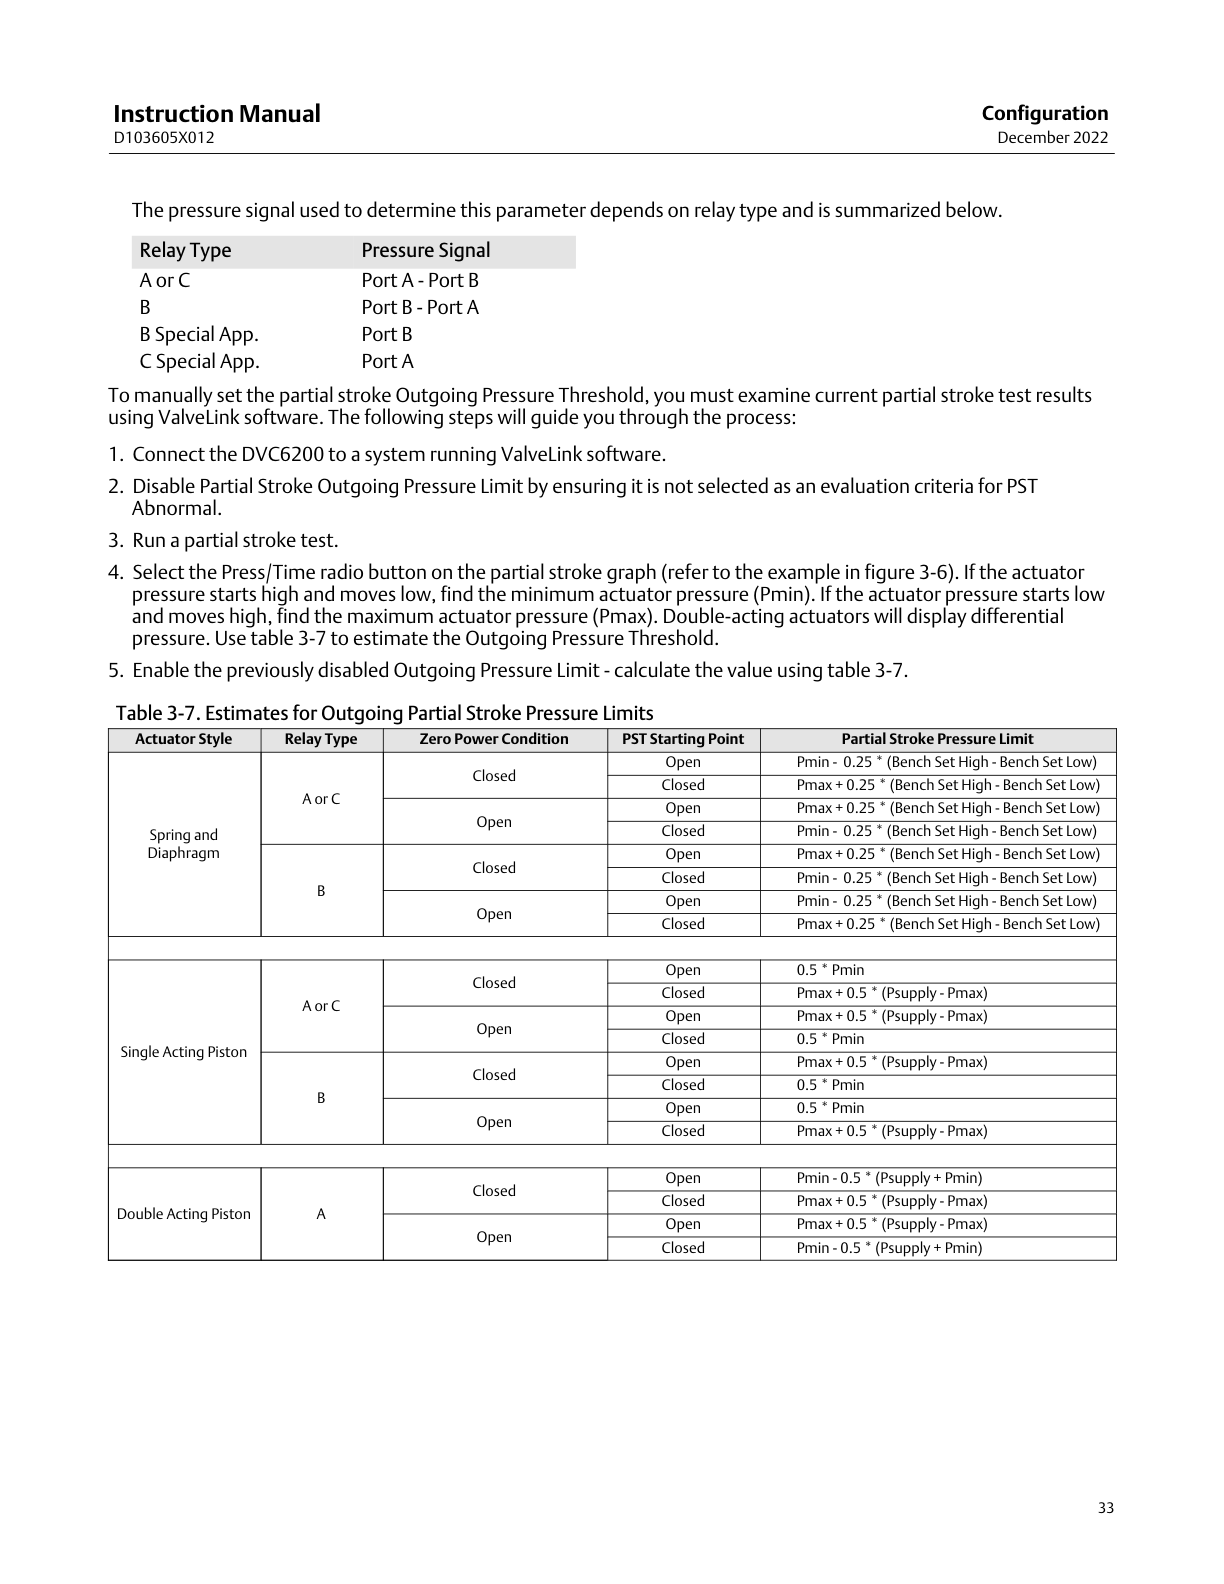

#summary
The document is an instruction manual from December 2022 that details the procedure for setting the partial stroke Outgoing Pressure Threshold for different relay types using ValveLink software. It specifies the pressure signal sources for different relay types and provides a comprehensive table (Table 3-7) for calculating the Outgoing Pressure Limits for various actuator styles and relay types under different conditions.

#content
- The document provides instructions on determining the partial stroke Outgoing Pressure Threshold based on relay type, which varies as follows:
  - Relay Type A or C: Pressure Signal from Port A - Port B
  - Relay Type B: Pressure Signal from Port B - Port A
  - Relay Type B Special Application: Pressure Signal from Port B
  - Relay Type C Special Application: Pressure Signal from Port A

- To manually set the threshold, the following steps should be taken:
  1. Connect the DVC6200 to a system running ValveLink software.
  2. Disable the Partial St

In [13]:
ocr_recognizer_1 = gpt_vision_client.call_gpt4v_image(
    image_file_paths[0],
    system_instruction=sys_message,
    user_instruction=user_prompt,
    ocr=False,
    use_vision_api=False,
    display_image=True,
    max_tokens=2000,
    seed=42,
)
print(ocr_recognizer_1)

2024-01-17 22:46:39,340 - micro - MainProcess - INFO     Preparing instruction for GPT-4 Vision API call. (transformer.py:prepare_instruction:119)
2024-01-17 22:46:39,341 - micro - MainProcess - INFO     Instruction: [{'role': 'system', 'content': [{'type': 'text', 'text': 'You are an AI assistant capable of processing and summarizing complex documents with diagrams and tables.'}]}, {'role': 'user', 'content': [{'type': 'text', 'text': "\nPlease analyze this document and provide the information in the following format:\n\n1. Summary: Provide a concise summary of the document, focusing on the main points and overall context.\n\n2. Content: Your task is to extract all information from the document in a detailed and granular manner. Pay special attention to tables and diagrams. Ensure that no information is omitted. Avoid summarizing; instead, be explicit with all the details and cells. Take your time, as the purpose is to thoroughly record all the information from the document.\n\n3. Cat

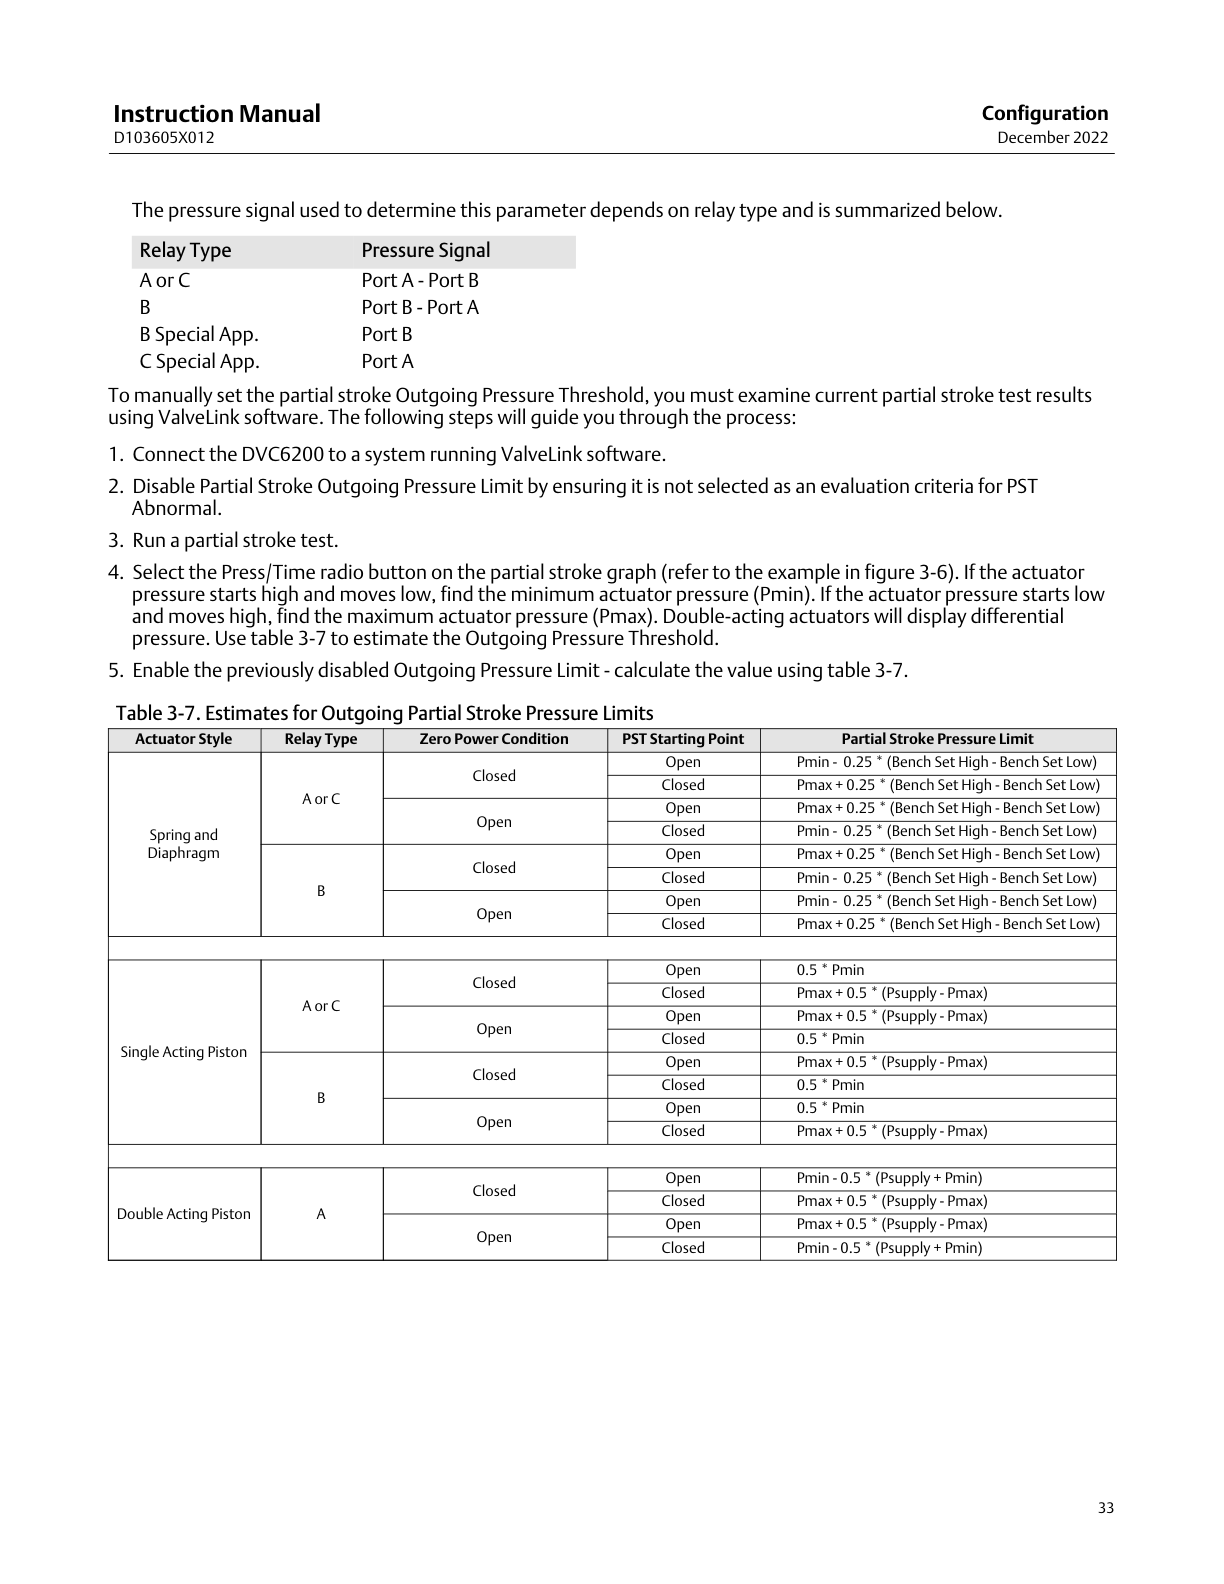

#summary
The document is an instruction manual from December 2022 that details the procedure for setting the partial stroke Outgoing Pressure Threshold for different relay types using ValveLink software. It specifies the pressure signal sources for different relay types and provides a comprehensive table (Table 3-7) for calculating the Outgoing Pressure Limit for actuators based on their style and relay type in various conditions.

#content
- The document instructs on determining the Outgoing Pressure Threshold based on relay type, which varies as follows:
  - Relay Type A or C: Pressure Signal from Port A - Port B
  - Relay Type B: Pressure Signal from Port B - Port A
  - Relay Type B Special Application: Pressure Signal from Port B
  - Relay Type C Special Application: Pressure Signal from Port A

- To manually set the threshold, the following steps should be taken:
  1. Connect the DVC6200 to a system running ValveLink software.
  2. Disable the Partial Stroke Outgoing Pressure Limi

In [14]:
ocr_recognizer_1 = gpt_vision_client.call_gpt4v_image(
    image_file_paths[0],
    system_instruction=sys_message,
    user_instruction=user_prompt,
    ocr=False,
    use_vision_api=True,
    display_image=True,
    max_tokens=2000,
    seed=42,
)
print(ocr_recognizer_1)

2024-01-17 22:47:48,031 - micro - MainProcess - INFO     Preparing instruction for GPT-4 Vision API call. (transformer.py:prepare_instruction:119)
2024-01-17 22:47:48,032 - micro - MainProcess - INFO     Instruction: [{'role': 'system', 'content': [{'type': 'text', 'text': 'You are an AI assistant capable of processing and summarizing complex documents with diagrams and tables.'}]}, {'role': 'user', 'content': [{'type': 'text', 'text': "\nPlease analyze this document and provide the information in the following format:\n\n1. Summary: Provide a concise summary of the document, focusing on the main points and overall context.\n\n2. Content: Your task is to extract all information from the document in a detailed and granular manner. Pay special attention to tables and diagrams. Ensure that no information is omitted. Avoid summarizing; instead, be explicit with all the details and cells. Take your time, as the purpose is to thoroughly record all the information from the document.\n\n3. Cat

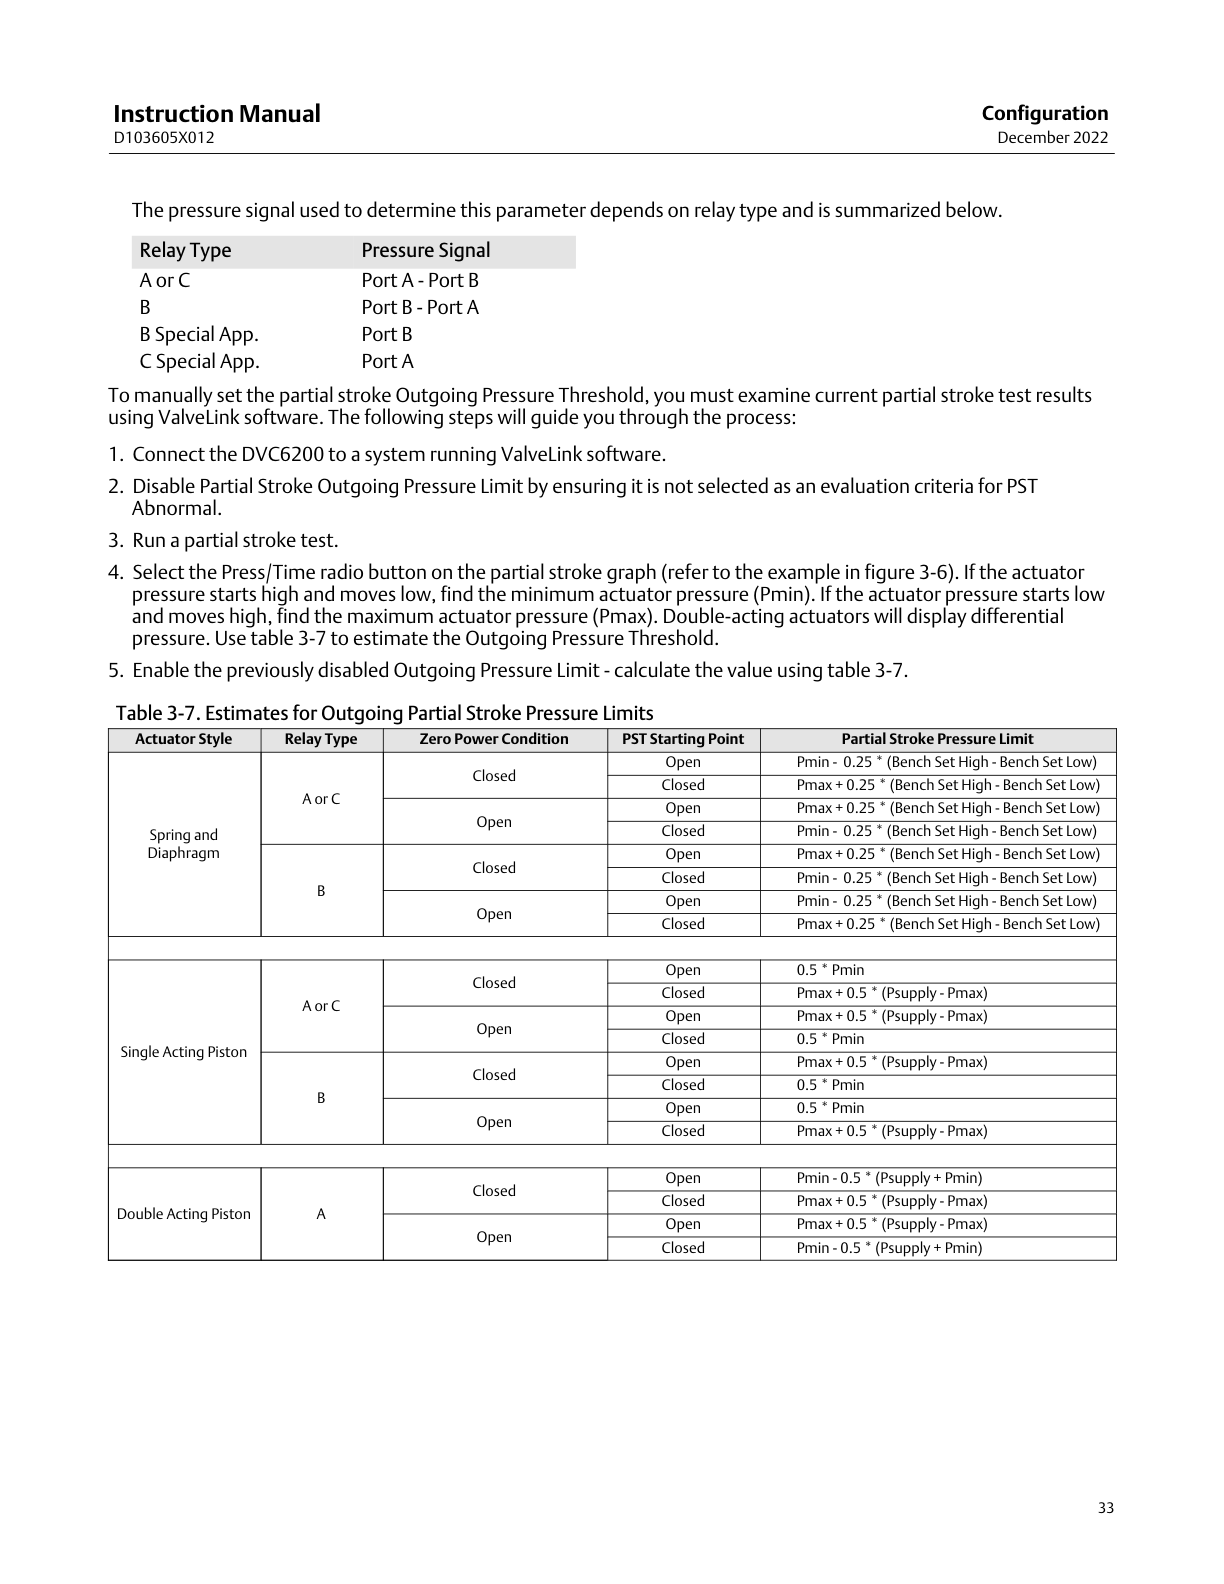

#summary
The document is an instruction manual from December 2022 detailing the configuration of the pressure signal for different relay types and the procedure for manually setting the Outgoing Pressure Threshold using ValveLink software. It includes a guide through the process of connecting the DVC6200, disabling and enabling Partial Stroke Outgoing Pressure Limit, running a partial stroke test, and using the provided Table 3-7 to calculate the Outgoing Pressure Threshold based on the actuator style, relay type, zero power condition, PST starting point, and partial stroke pressure limit.

#content
- Title: Instruction Manual
- Part Number: D103605X012
- Date: December 2022
- Description of pressure signal determination based on relay type:
  - Relay Type A or C: Pressure Signal = Port A - Port B
  - Relay Type B: Pressure Signal = Port B - Port A
  - Relay Type B Special Application: Pressure Signal = Port B
  - Relay Type C Special Application: Pressure Signal = Port A
- Procedure f

In [15]:
ocr_recognizer_1 = gpt_vision_client.call_gpt4v_image(
    image_file_paths[0],
    system_instruction=sys_message,
    user_instruction=user_prompt,
    ocr=True,
    use_vision_api=False,
    display_image=True,
    max_tokens=2000,
    seed=42,
)
print(ocr_recognizer_1)

2024-01-17 22:51:13,195 - micro - MainProcess - INFO     Preparing instruction for GPT-4 Vision API call. (transformer.py:prepare_instruction:119)
2024-01-17 22:51:13,197 - micro - MainProcess - INFO     Instruction: [{'role': 'system', 'content': [{'type': 'text', 'text': 'You are an AI assistant capable of processing and summarizing complex documents with diagrams and tables.'}]}, {'role': 'user', 'content': [{'type': 'text', 'text': "\nPlease analyze this document and provide the information in the following format:\n\n1. Summary: Provide a concise summary of the document, focusing on the main points and overall context.\n\n2. Content: Your task is to extract all information from the document in a detailed and granular manner. Pay special attention to tables and diagrams. Ensure that no information is omitted. Avoid summarizing; instead, be explicit with all the details and cells. Take your time, as the purpose is to thoroughly record all the information from the document.\n\n3. Cat

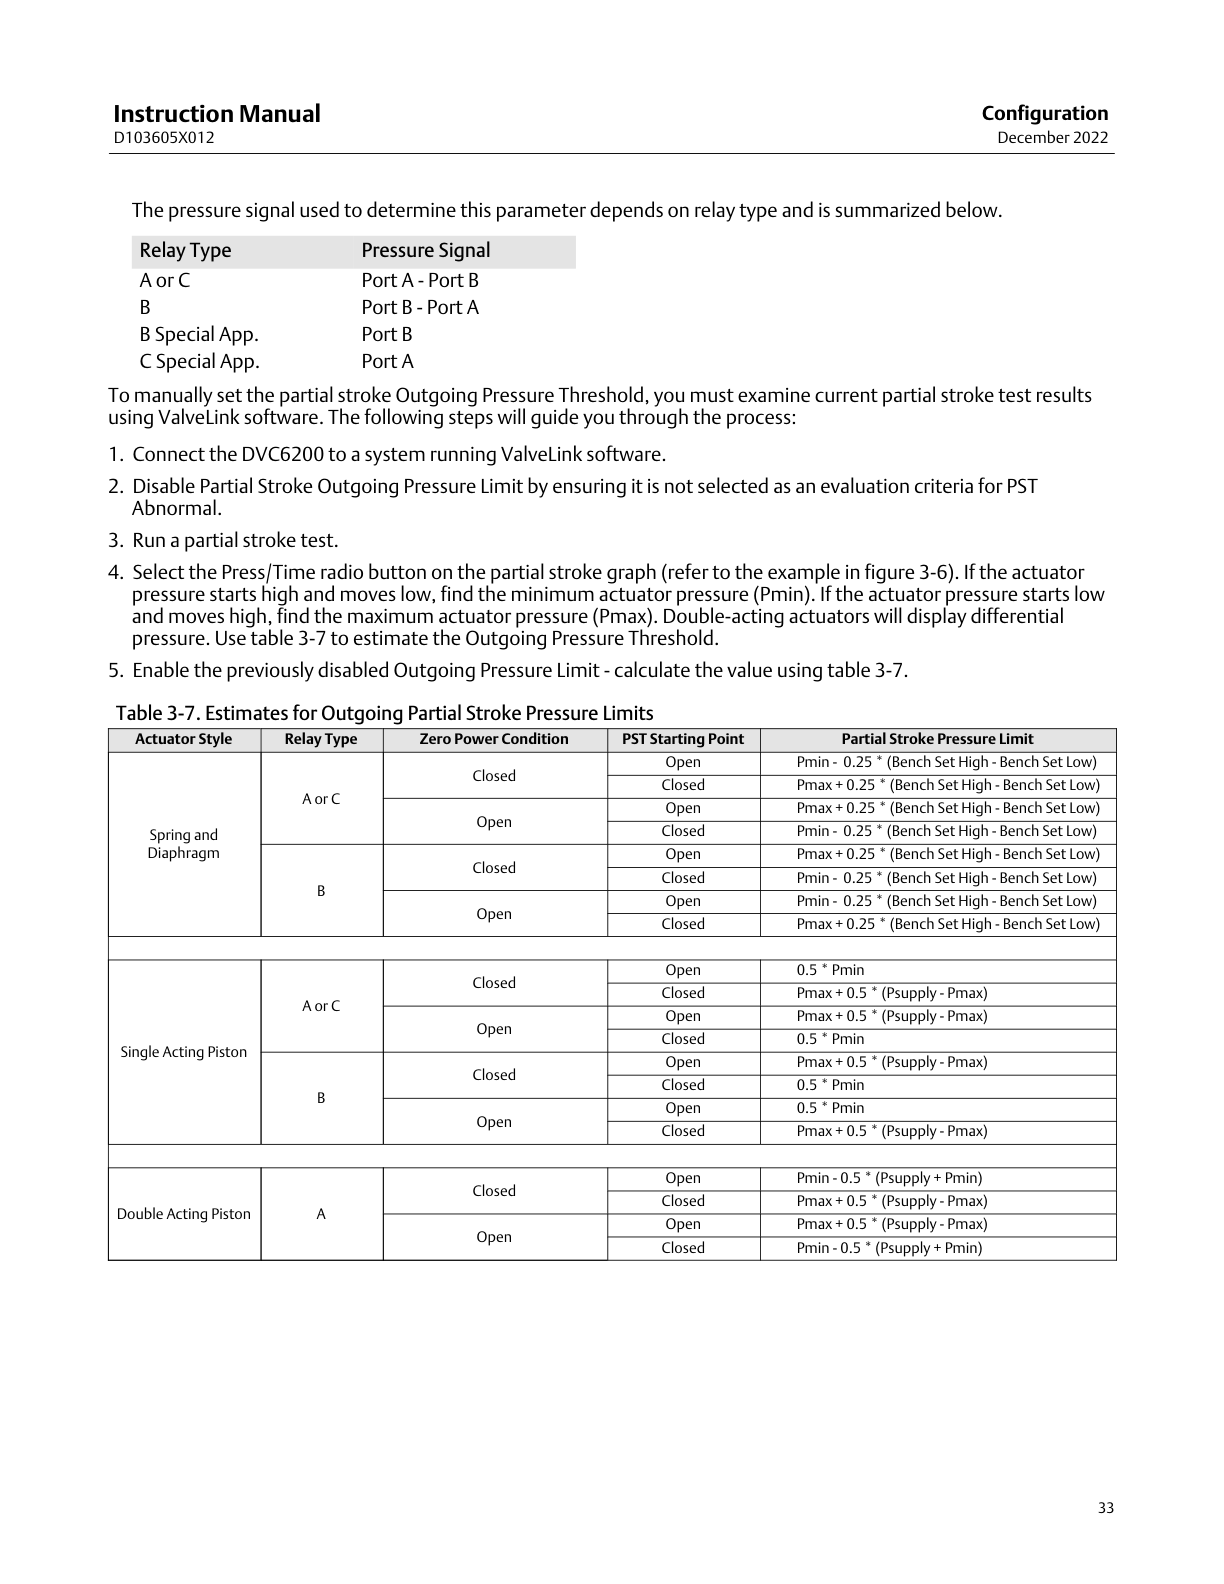

#summary
The document is an instruction manual from December 2022 detailing the configuration of the partial stroke Outgoing Pressure Threshold for different relay types using ValveLink software. It includes a step-by-step guide for setting the threshold, which involves connecting to the software, running a test, and calculating the value based on test results and relay type. A table (Table 3-7) provides estimates for the Outgoing Partial Stroke Pressure Limits for various actuator styles and relay types, considering different zero power conditions and starting points.

#content
- The document provides instructions for setting the partial stroke Outgoing Pressure Threshold.
- The pressure signal varies by relay type: 
  - A or C uses Port A - Port B.
  - B uses Port B - Port A.
  - B Special Application uses Port B.
  - C Special Application uses Port A.
- Steps to set the threshold using ValveLink software:
  1. Connect the DVC6200 to the system with ValveLink software.
  2. Disable P

In [17]:
ocr_recognizer_1 = gpt_vision_client.call_gpt4v_image(
    image_file_paths[0],
    system_instruction=sys_message,
    user_instruction=user_prompt,
    ocr=True,
    use_vision_api=False,
    display_image=True,
    max_tokens=2000,
    seed=42,
)
print(ocr_recognizer_1)

2024-01-17 22:49:47,329 - micro - MainProcess - INFO     Preparing instruction for GPT-4 Vision API call. (transformer.py:prepare_instruction:119)
2024-01-17 22:49:47,331 - micro - MainProcess - INFO     Instruction: [{'role': 'system', 'content': [{'type': 'text', 'text': 'You are an AI assistant capable of processing and summarizing complex documents with diagrams and tables.'}]}, {'role': 'user', 'content': [{'type': 'text', 'text': "\nPlease analyze this document and provide the information in the following format:\n\n1. Summary: Provide a concise summary of the document, focusing on the main points and overall context.\n\n2. Content: Your task is to extract all information from the document in a detailed and granular manner. Pay special attention to tables and diagrams. Ensure that no information is omitted. Avoid summarizing; instead, be explicit with all the details and cells. Take your time, as the purpose is to thoroughly record all the information from the document.\n\n3. Cat

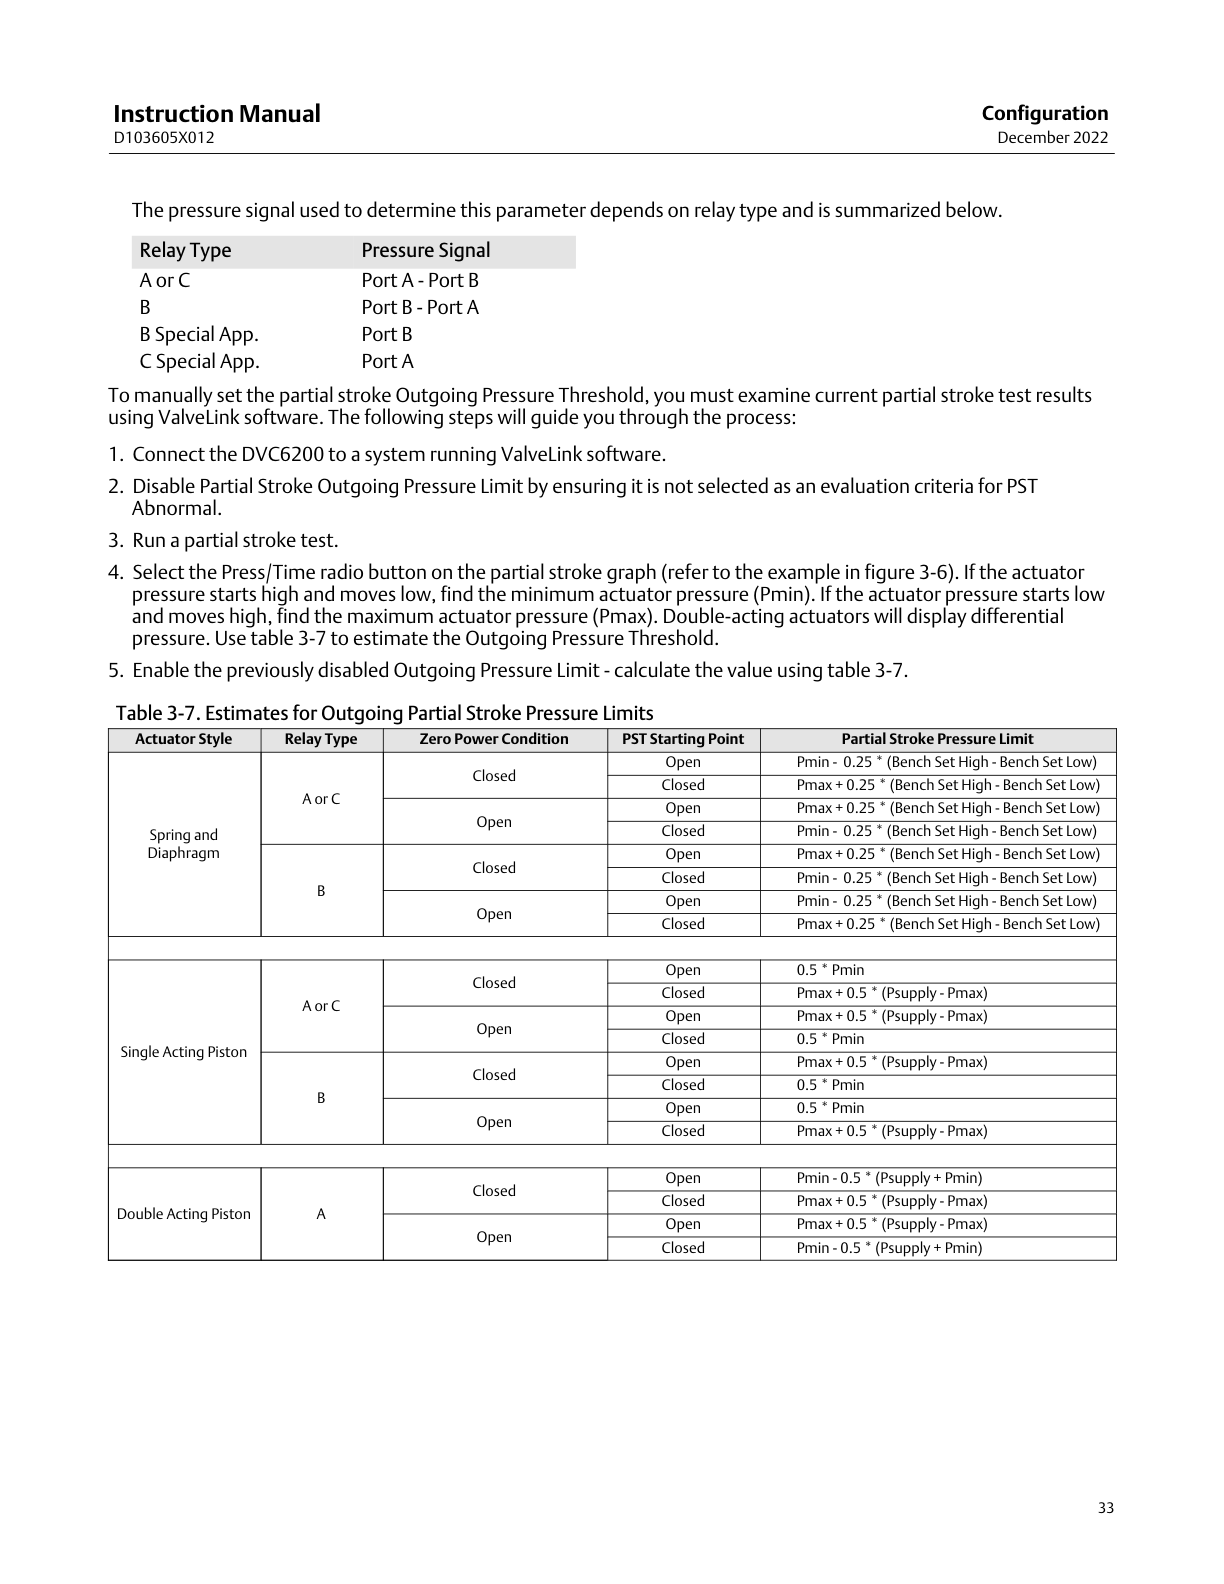

#summary
The document is an instruction manual from December 2022 that details the procedure for setting the partial stroke Outgoing Pressure Threshold for different relay types using ValveLink software. It specifies the pressure signal sources for different relay types and provides a detailed table for determining the Outgoing Pressure Limits for various actuator styles and relay type combinations under different conditions.

#content
- The document provides instructions on determining the Outgoing Pressure Threshold for partial stroke testing (PST) in a system using ValveLink software.
- The pressure signal used for this parameter varies based on the relay type:
  - Relay type A or C uses Port A - Port B as the pressure signal.
  - Relay type B uses Port B - Port A.
  - Relay type B Special Application uses Port B.
  - Relay type C Special Application uses Port A.
- To manually set the partial stroke Outgoing Pressure Threshold:
  1. The current partial stroke test results must be ex

In [16]:
ocr_recognizer_1 = gpt_vision_client.call_gpt4v_image(
    image_file_paths[0],
    system_instruction=sys_message,
    user_instruction=user_prompt,
    ocr=False,
    use_vision_api=False,
    display_image=True,
    max_tokens=2000,
    seed=42,
)
print(ocr_recognizer_1)

2024-01-17 22:41:57,652 - micro - MainProcess - INFO     Preparing instruction for GPT-4 Vision API call. (transformer.py:prepare_instruction:119)
2024-01-17 22:41:57,654 - micro - MainProcess - INFO     Instruction: [{'role': 'system', 'content': [{'type': 'text', 'text': 'You are an AI assistant capable of processing and summarizing complex documents with diagrams and tables.'}]}, {'role': 'user', 'content': [{'type': 'text', 'text': "\nPlease analyze this document and provide the information in the following format:\n\n1. Summary: Provide a concise summary of the document, focusing on the main points and overall context.\n\n2. Content: Your task is to extract all information from the document in a detailed and granular manner. Pay special attention to tables and diagrams. Ensure that no information is omitted. Avoid summarizing; instead, be explicit with all the details and cells. Take your time, as the purpose is to thoroughly record all the information from the document.\n\n3. Cat

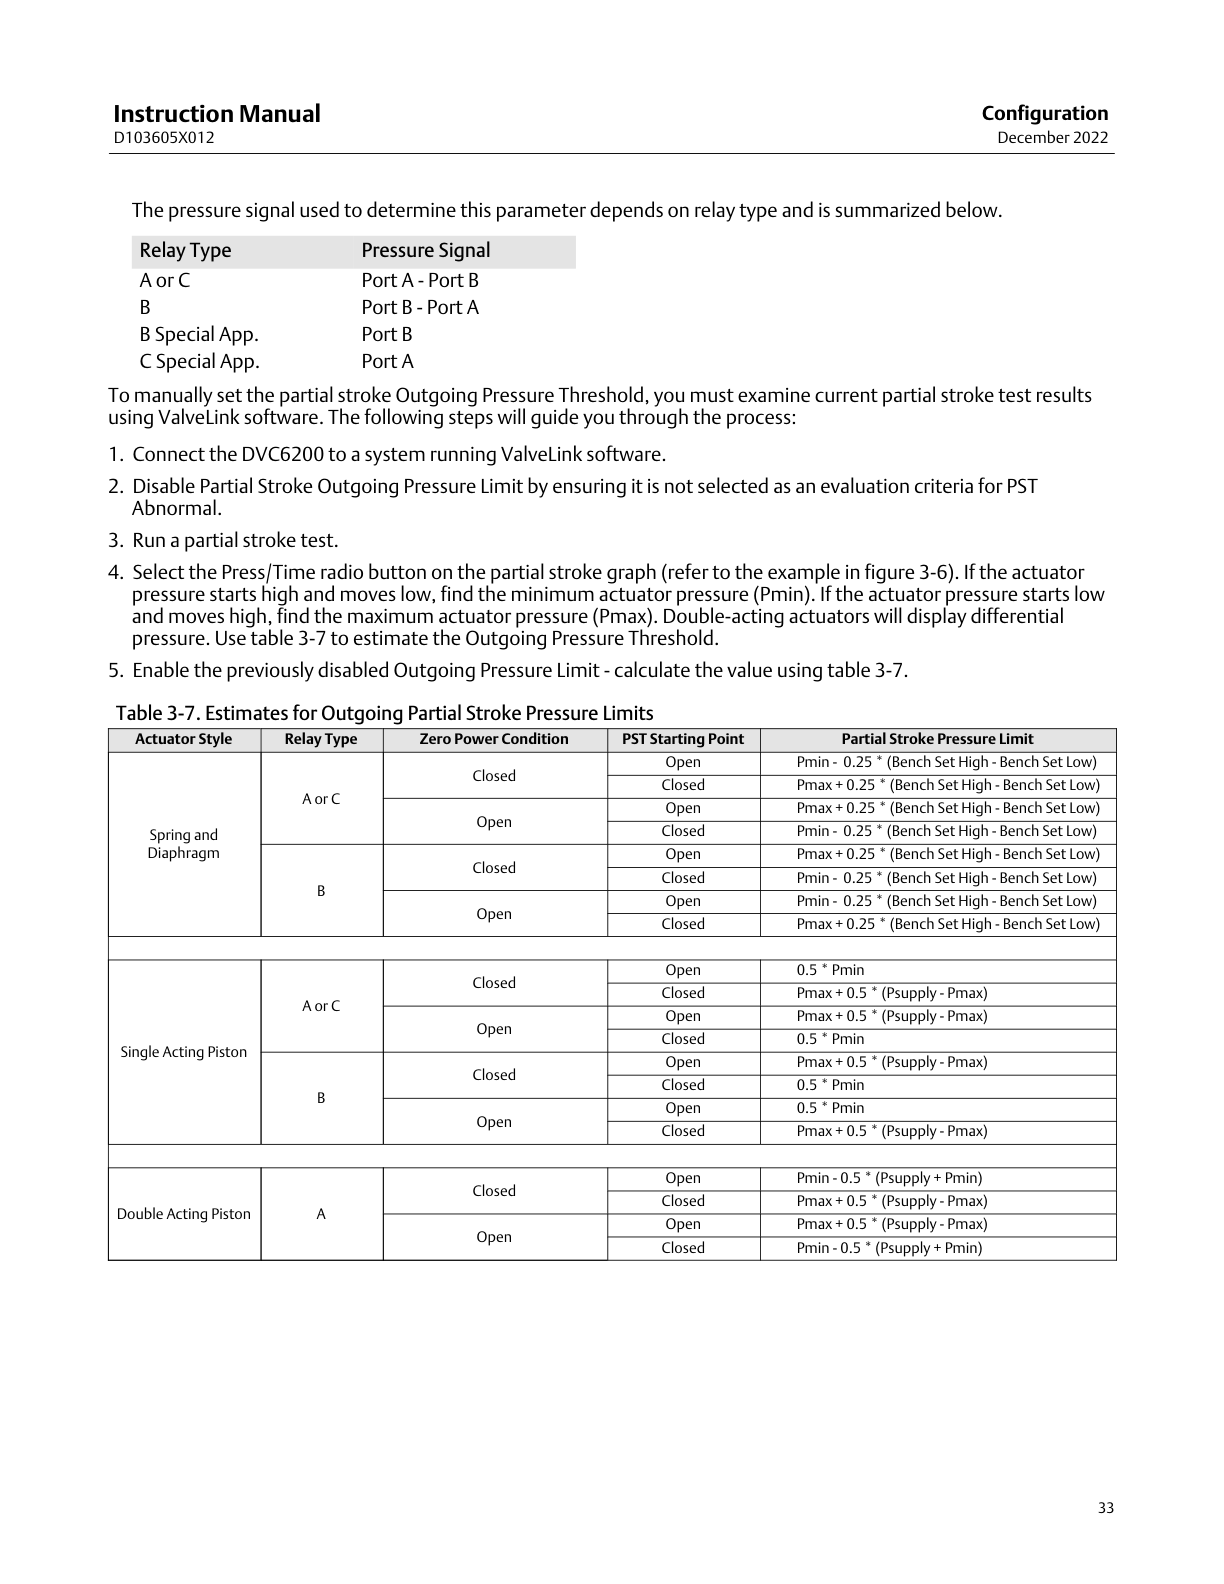

#summary
The document is an instruction manual from December 2022 detailing the configuration of the pressure signal for different relay types and the procedure for manually setting the Outgoing Pressure Threshold using ValveLink software. It includes a guide through the process of connecting the DVC6200, disabling and enabling the Outgoing Pressure Limit, running a partial stroke test, and using table 3-7 to calculate the threshold. Table 3-7 provides estimates for Outgoing Partial Stroke Pressure Limits based on actuator style, relay type, zero power condition, PST starting point, and the partial stroke pressure limit calculation formulae.

#content
- **Relay Type and Pressure Signal:**
  - Relay Type A or C: Pressure Signal = Port A - Port B
  - Relay Type B: Pressure Signal = Port B - Port A
  - Relay Type B Special Application: Pressure Signal = Port B
  - Relay Type C Special Application: Pressure Signal = Port A

- **Procedure to Set Partial Stroke Outgoing Pressure Threshold:**

In [12]:
ocr_recognizer_1 = gpt_vision_client.call_gpt4v_image(
    image_file_paths[0],
    system_instruction=sys_message,
    user_instruction=user_prompt,
    ocr=True,
    use_vision_api=True,
    display_image=True,
    max_tokens=2000,
    seed=42,
)
print(ocr_recognizer_1)